In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip',  'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization, Dropout

In [5]:
# Generators are used to process large amount of Data
#
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
 ### above data stored in the form of array with range of 0 - 255 .
 ### We have to normalise data in range of 0 - 1
 # Normalize

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


### Creating CNN Model

In [7]:
## Creating cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape =  (256, 256, 3)))
# for reducing overfitting add batch normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3 , 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())


model.add(Dense(128, activation = 'relu'))
#for reducing overfitting add dropout layer
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs = 15, validation_data = validation_ds)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 85ms/step - accuracy: 0.5626 - loss: 2.6653 - val_accuracy: 0.5974 - val_loss: 0.7648
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.6514 - loss: 0.6221 - val_accuracy: 0.6906 - val_loss: 0.5927
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6949 - loss: 0.5840 - val_accuracy: 0.7230 - val_loss: 0.5460
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.7538 - loss: 0.5085 - val_accuracy: 0.7148 - val_loss: 0.5586
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.7906 - loss: 0.4421 - val_accuracy: 0.7074 - val_loss: 0.5541
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.8079 - loss: 0.4169 - val_accuracy: 0.7906 - val_loss: 0.4716
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8393 - loss: 0.3510 - val_accuracy: 0.8232 - val_loss: 0.3965
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8647 - loss: 0.2973 - 

In [ ]:
## plotting the graphs to check performanc of our model
# Checking for the accuracy add loss

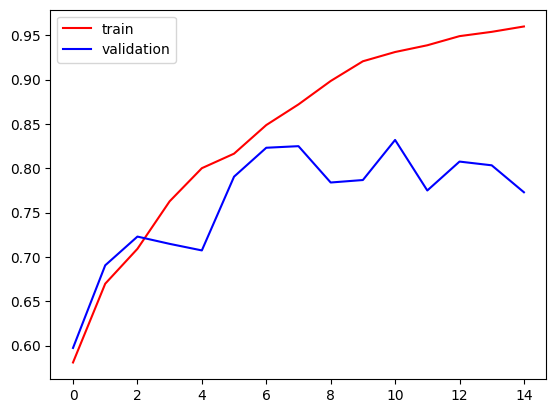

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color= 'blue', label = 'validation')
plt.legend()
plt.show()

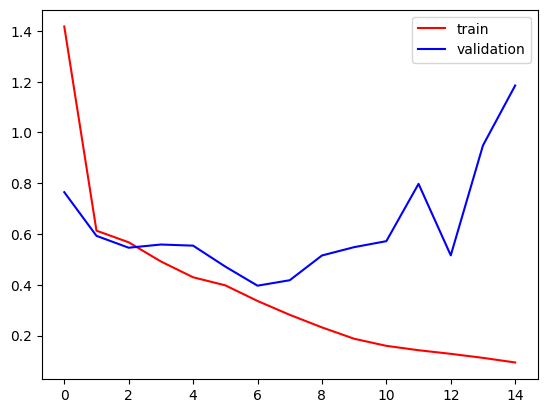

In [37]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color= 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
## From above graphs it concludes that gap between both is high means
# overfitting is happening
# Way to reduce the Overfitting
'''
1) Add more data
2) Data Augmentation
3) L1 / L2 Regularizer
4) Dropout
5) Batch normalization
6) Reduce complexity

'''

'\n1) Add more data\n2) Data Augmentation\n3) L1 / L2 Regularizer\n4) Dropout\n5) Batch normalization\n6) Reduce complexity\n\n'

In [ ]:
# Lets apply Dropout and batch normalization to reduce overfitting

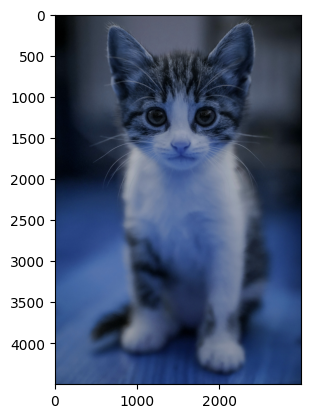

In [32]:
## Prediction for the new input
import cv2
test_img = cv2.imread('/content/cat2.jpeg')
plt.imshow(test_img)

In [33]:
test_img.shape

(4500, 3000, 3)

In [34]:
test_img = cv2.resize(test_img, (256, 256))


In [35]:
test_input = test_img.reshape((1, 256, 256, 3))

In [36]:
prediction = model.predict(test_input)
if (prediction[0] == 0):
  print('this is CAT.')

else :
  print('this is DOG.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
this is CAT.
